## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
## Boston->線性；Wine->類別

#### 1

In [2]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import pandas as pd

In [3]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(
        criterion= 'gini',
        max_depth= 5,
        min_samples_split= 2,
        min_samples_leaf= 4)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [4]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.01140681 0.         0.05512761 0.93346558]


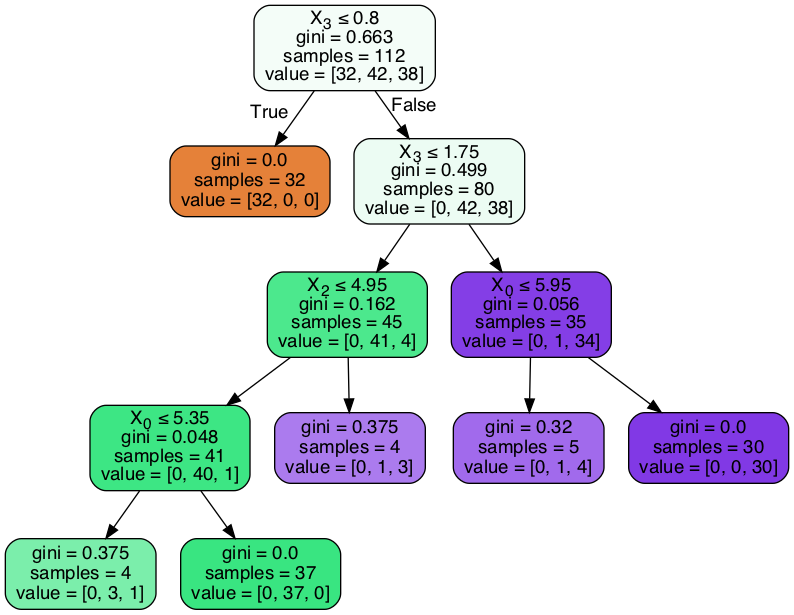

In [5]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [6]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(
        criterion= 'entropy',
        max_depth= 5,
        min_samples_split= 2,
        min_samples_leaf= 4)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [7]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.03892992 0.         0.6376172  0.32345287]


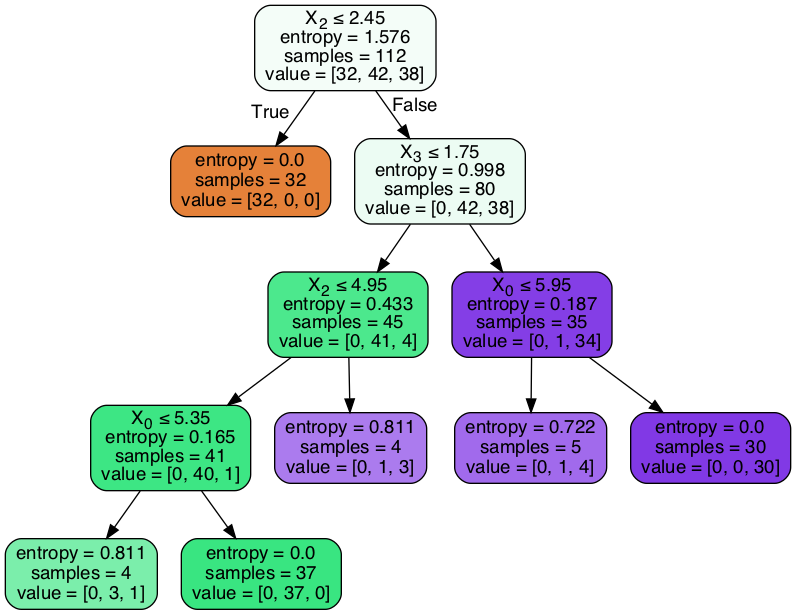

In [8]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 用Entropy來看的話，可以發現第一個分類決策由X2變成了X3！！

### 2-1 Boston

#### DecisionTreeRegressor with 'mse'

In [9]:
# 讀取鳶尾花資料集
boston = datasets.load_boston()

Boston = pd.DataFrame(boston.data, columns = boston.feature_names)

print(Boston.shape)

(506, 13)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.05612347 0.         0.         0.         0.         0.6350174
 0.         0.01044343 0.         0.         0.         0.
 0.29841569]


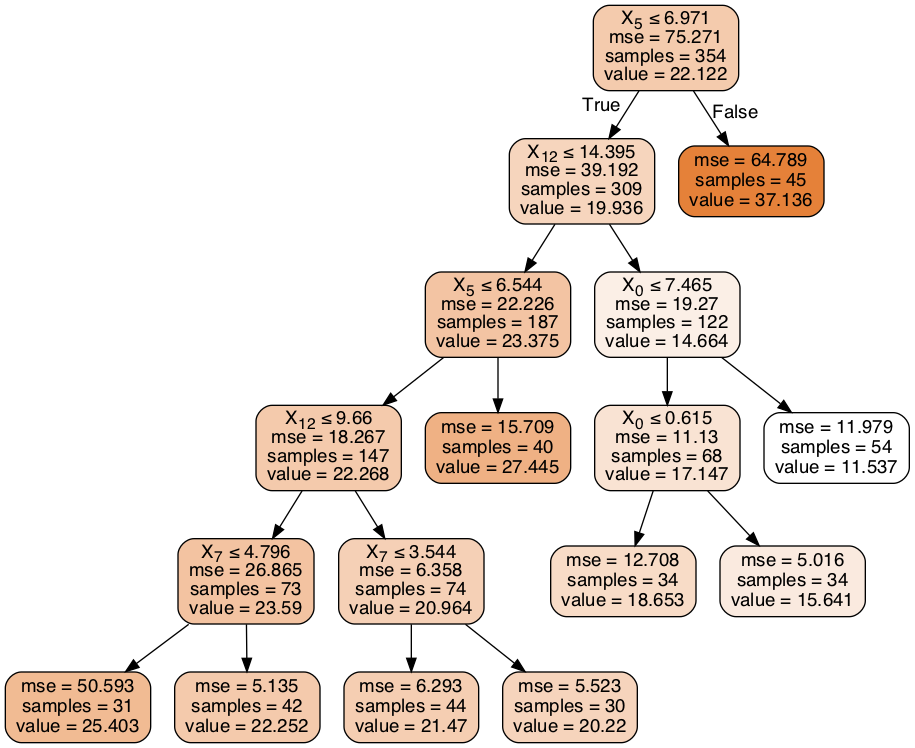

In [10]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=4)

# 建立模型
clf = DecisionTreeRegressor(
        criterion= 'mse',
        max_depth= 5,
        min_samples_split= 30,
        min_samples_leaf= 30)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

# acc = metrics.accuracy_score(y_test, y_pred)
# print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 用Entropy來看的話，可以發現第一個分類決策由X2變成了X3！！

#### DecisionTreeRegressor with 'mae'

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.12018748 0.         0.         0.         0.         0.35344828
 0.         0.01330767 0.         0.         0.         0.
 0.51305658]


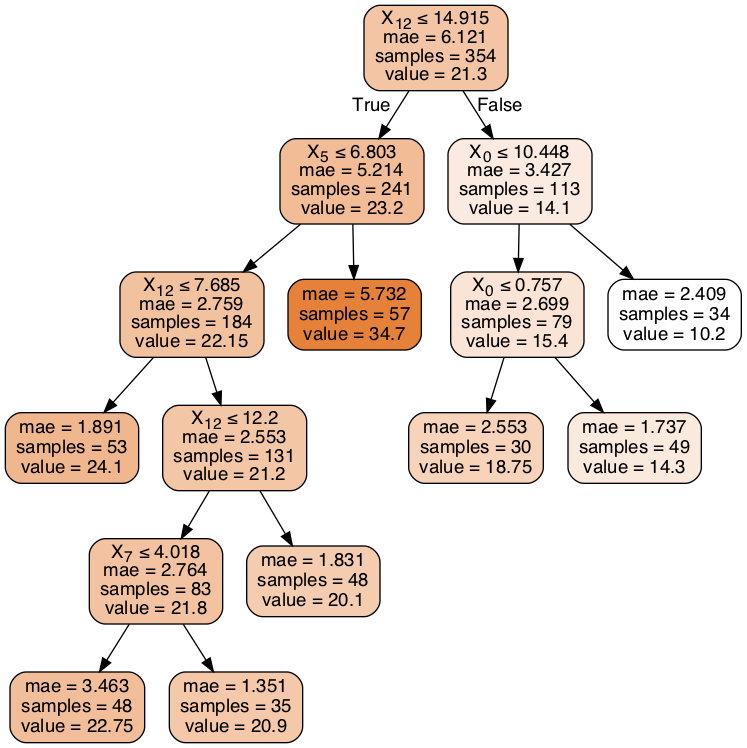

In [11]:
# 讀取鳶尾花資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=4)

# 建立模型
clf = DecisionTreeRegressor(
        criterion= 'mae',
        max_depth= 5,
        min_samples_split= 30,
        min_samples_leaf= 30)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

# acc = metrics.accuracy_score(y_test, y_pred)
# print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 用Entropy來看的話，可以發現第一個分類決策由X2變成了X3！！

### 2-2 Wine

#### DecisionTreeClassifier with 'gini'

In [12]:
# 讀取鳶尾花資料集
wine = datasets.load_wine()
Wine = pd.DataFrame(wine.data, columns = wine.feature_names)
print(Wine.shape)

(178, 13)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.08819182 0.         0.         0.         0.         0.
 0.45862262 0.         0.         0.45318556 0.         0.
 0.        ]


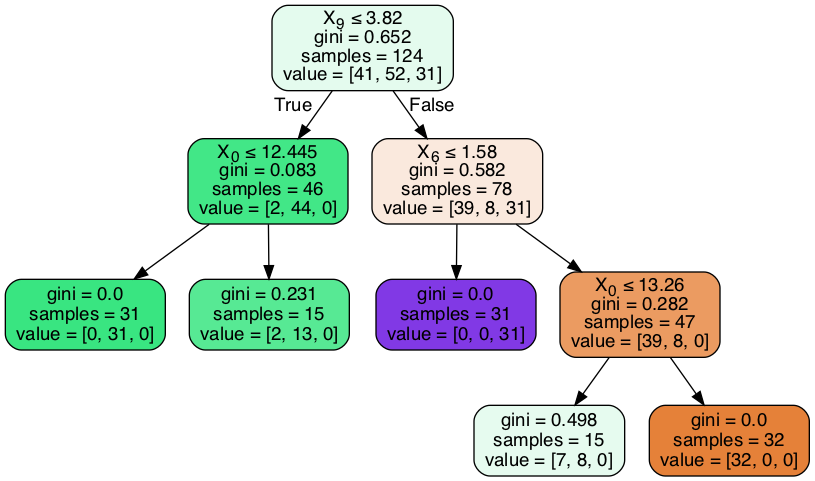

In [13]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(
        criterion= 'gini',
        max_depth= 5,
        min_samples_split= 15,
        min_samples_leaf= 15)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

# acc = metrics.accuracy_score(y_test, y_pred)
# print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 用Entropy來看的話，可以發現第一個分類決策由X2變成了X3！！

#### DecisionTreeClassifier with 'entropy'

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.         0.         0.         0.         0.         0.00960327
 0.         0.         0.         0.06955093 0.         0.49884915
 0.42199665]


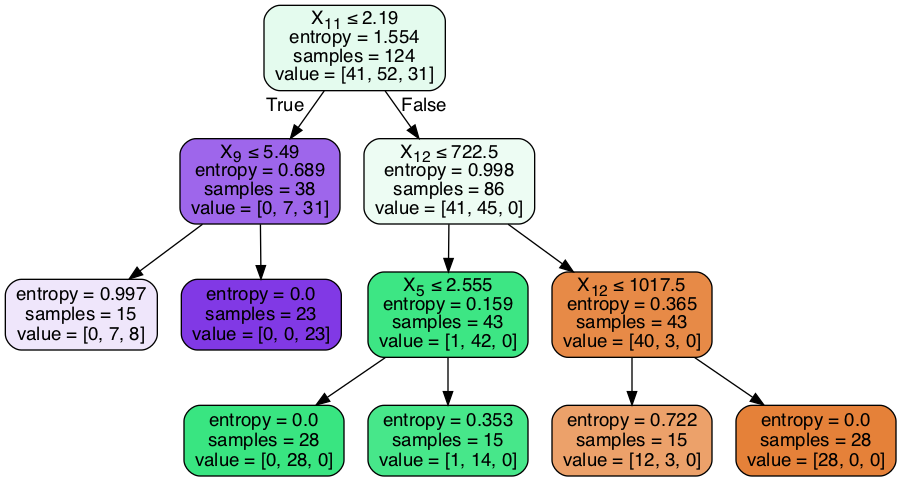

In [14]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(
        criterion= 'entropy',
        max_depth= 5,
        min_samples_split= 15,
        min_samples_leaf= 15)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

# acc = metrics.accuracy_score(y_test, y_pred)
# print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 用Entropy來看的話，可以發現第一個分類決策由X2變成了X3！！